<a href="https://colab.research.google.com/github/hasune613/hello-world/blob/main/LGBM_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
! ls drive

MyDrive


In [ ]:
import numpy as np
import pandas as pd
import os

In [ ]:
train= pd.read_csv('/content/drive/MyDrive/kaggle/train.csv')
test = pd.read_csv('/content/drive/MyDrive/kaggle/test.csv')
sample_submission = pd.read_csv('/content/drive/MyDrive/kaggle/gender_submission.csv')

In [ ]:
train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [ ]:
train.shape,test.shape,sample_submission.shape

((891, 12), (418, 11), (418, 2))

In [ ]:
train.columns,test.columns,sample_submission.columns,

(Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
        'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
       dtype='object'),
 Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
        'Ticket', 'Fare', 'Cabin', 'Embarked'],
       dtype='object'),
 Index(['PassengerId', 'Survived'], dtype='object'))

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
train = pd.get_dummies(train,columns=['Sex','Embarked'])
test = pd.get_dummies(test,columns=['Sex','Embarked'])
train.drop(['PassengerId','Name','Cabin','Ticket'],axis=1,inplace=True)
test.drop(['PassengerId','Name','Cabin','Ticket'],axis=1,inplace=True)


In [ ]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1


In [ ]:
test.columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female', 'Sex_male',
       'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

<iframe src="https://www.kaggle.com/embed/currypurin/tutorial-of-kaggle-ver3-ch5?cellIds=9&kernelSessionId=16264040" height="300" style="margin: 0 auto; width: 100%; max-width: 950px;" frameborder="0" scrolling="auto" title="tutorial of kaggle ver3 ch5"></iframe>

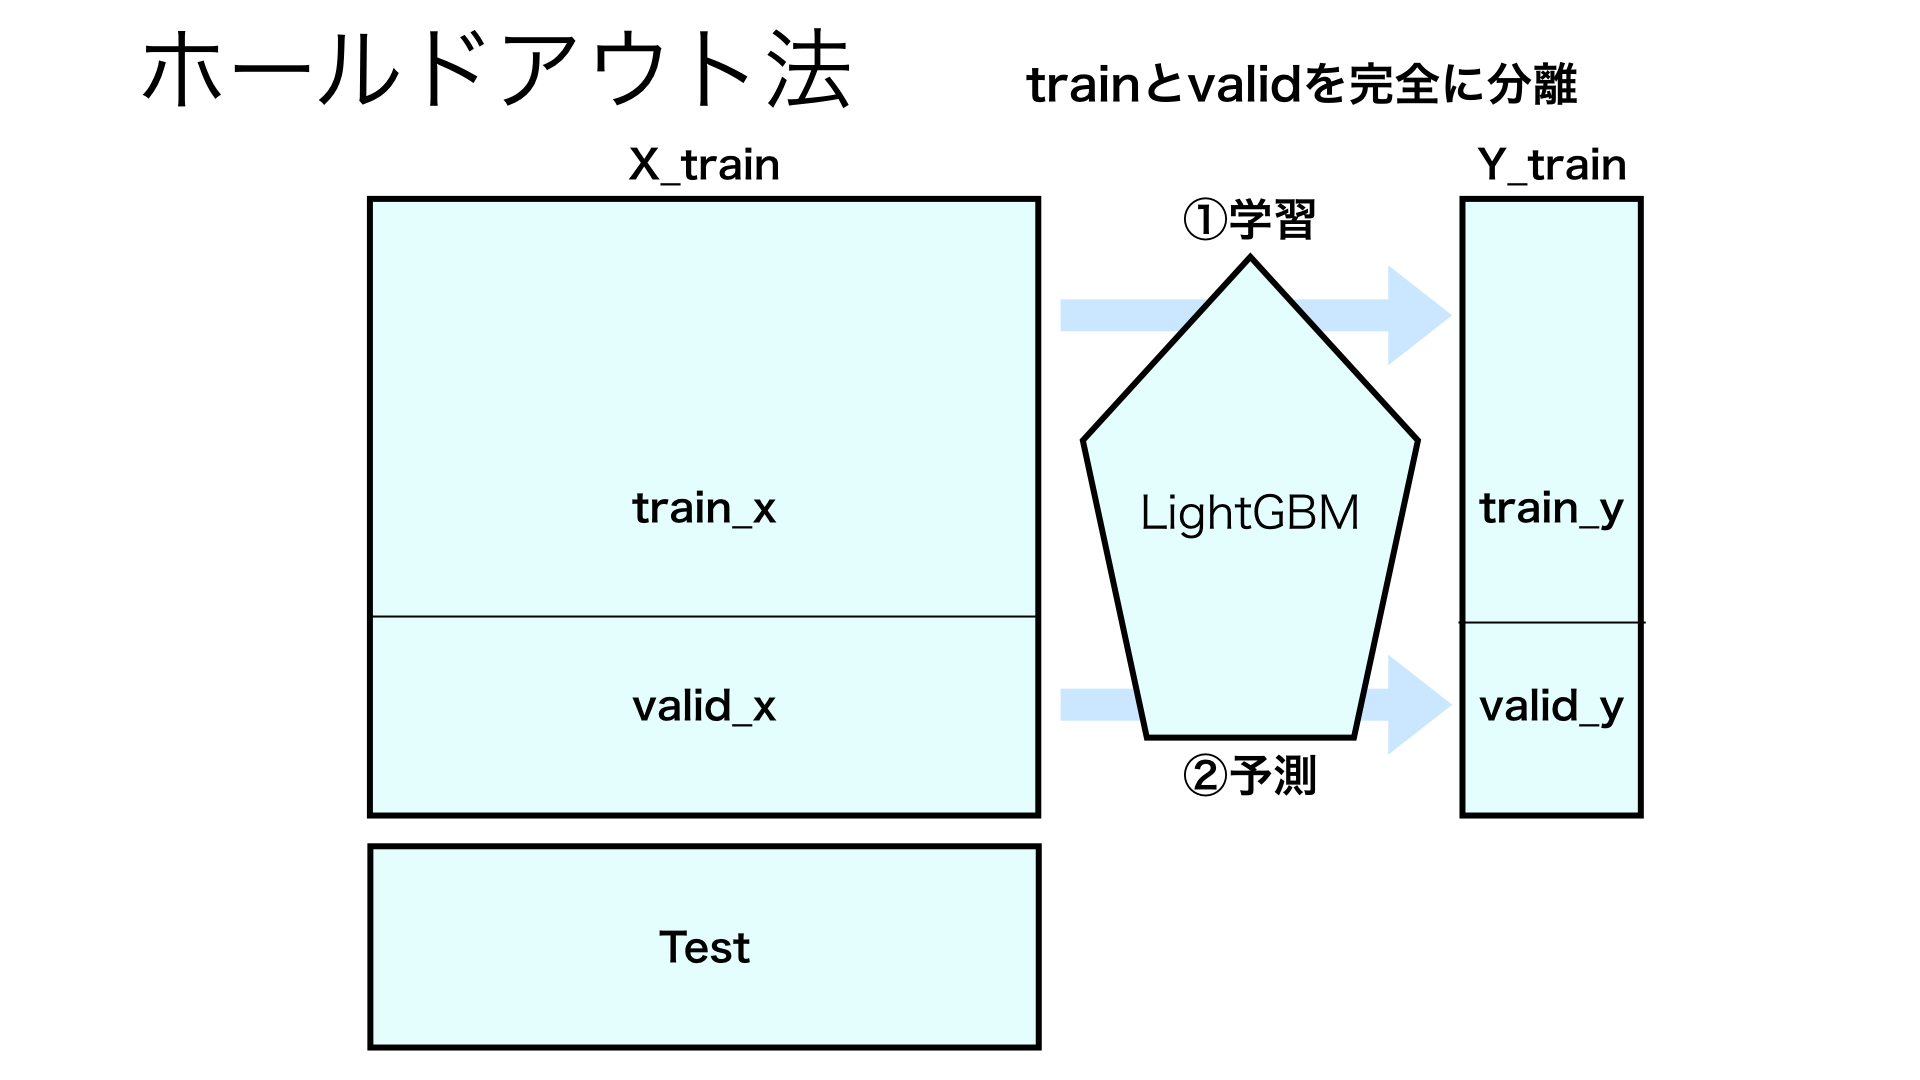

In [ ]:
#ホールドアウト法(trainとvalidを完全分離)
X_train = train.drop(['Survived'], axis=1)  # X_trainはtrainのSurvived列以外
Y_train = train['Survived']  # Y_trainはtrainのSurvived列

In [ ]:
X_train.info()
X_train.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      891 non-null    int64  
 1   Age         714 non-null    float64
 2   SibSp       891 non-null    int64  
 3   Parch       891 non-null    int64  
 4   Fare        891 non-null    float64
 5   Sex_female  891 non-null    uint8  
 6   Sex_male    891 non-null    uint8  
 7   Embarked_C  891 non-null    uint8  
 8   Embarked_Q  891 non-null    uint8  
 9   Embarked_S  891 non-null    uint8  
dtypes: float64(2), int64(3), uint8(5)
memory usage: 39.3 KB


(891, 10)

In [ ]:
Y_train[:5]

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [ ]:
!pip install -q lightgbm

In [ ]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# X_trainとY_trainをtrainとvalidに分割
x_train, x_valid, y_train, y_valid = train_test_split(X_train, Y_train, test_size=0.33, random_state=0)
x_train.shape,x_valid.shape,y_train.shape,y_valid.shape

((596, 10), (295, 10), (596,), (295,))

In [ ]:
#LightGBMの分類器をインスタンス化
gbm = lgb.LGBMClassifier(objective='binary')

# trainとvalidを指定し学習
gbm.fit(x_train, y_train, eval_set = [(x_valid, y_valid)],
            early_stopping_rounds=20,  # 20回連続でlossが下がらなかったら終了
            verbose=10  # 10round毎に、lossを表示
)

Training until validation scores don't improve for 20 rounds.
[10]	valid_0's binary_logloss: 0.465153
[20]	valid_0's binary_logloss: 0.419539
[30]	valid_0's binary_logloss: 0.40614
[40]	valid_0's binary_logloss: 0.402566
[50]	valid_0's binary_logloss: 0.409918
[60]	valid_0's binary_logloss: 0.415006
Early stopping, best iteration is:
[40]	valid_0's binary_logloss: 0.402566


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective='binary',
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [ ]:
oof = gbm.predict(x_valid,num_iteration=gbm.best_iteration_)
print('score',round(accuracy_score(y_valid,oof)*100,3))

score 81.695


In [ ]:
X_train

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,2,27.0,0,0,13.0000,0,1,0,0,1
887,1,19.0,0,0,30.0000,1,0,0,0,1
888,3,NaN,1,2,23.4500,1,0,0,0,1
889,1,26.0,0,0,30.0000,0,1,1,0,0


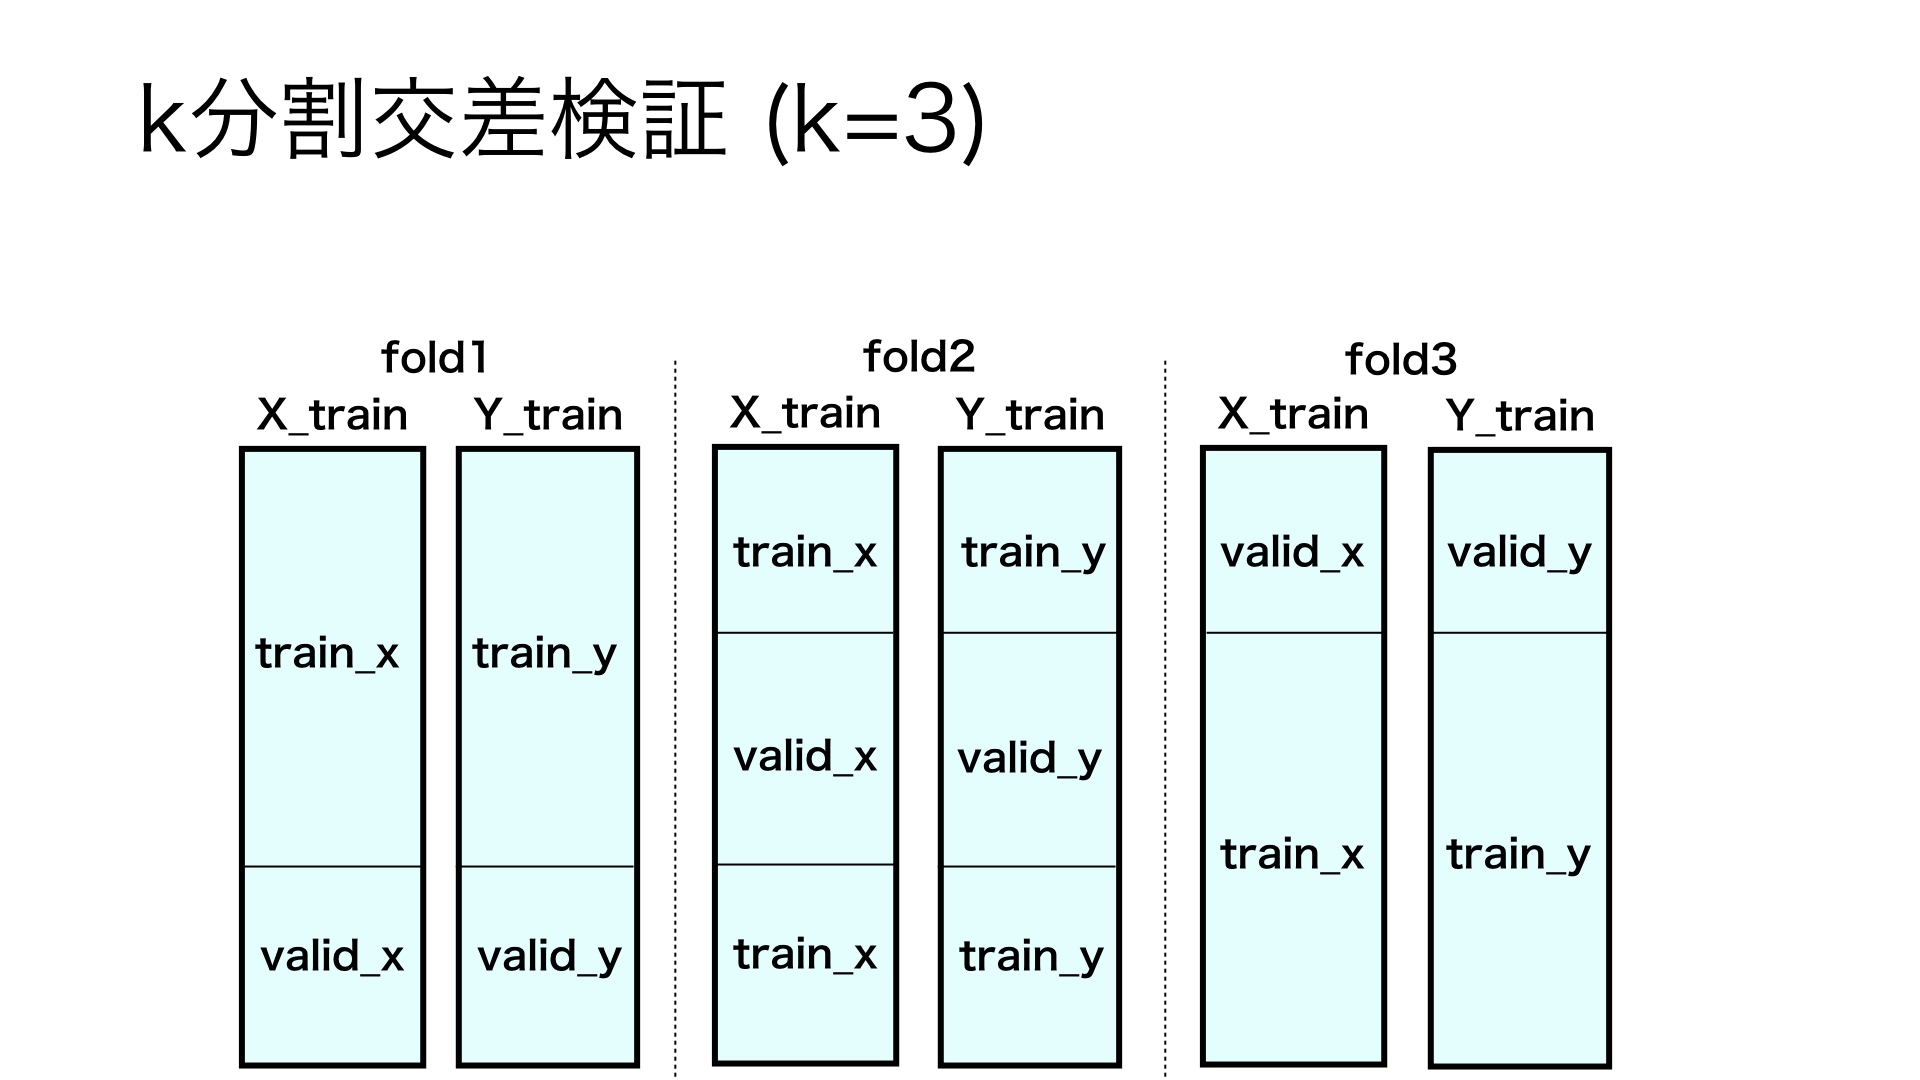

In [ ]:
# 3分割交差検証を指定し、インスタンス化
from sklearn.model_selection import KFold
kf = KFold(n_splits=3)

score_list = []
models = []

for fold_, (train_index, valid_index) in enumerate(kf.split(X_train, Y_train)):
    x_train = X_train.iloc[train_index]
    x_valid = X_train.iloc[valid_index]
    y_train = Y_train[train_index]
    y_valid = Y_train[valid_index]
    print(f'fold{fold_ +1} start')

    gbm = lgb.LGBMClassifier(objective='binary')
    gbm.fit(x_train,y_train,eval_set=[(x_valid,y_valid)],
            early_stopping_rounds=20,
            verbose=-1) #学習状況を表示しない
    oof = gbm.predict(x_valid,num_iteration=gbm.best_iteration_)
    score_list.append(round(accuracy_score(y_valid,oof)*100,2))
    models.append(gbm)
    print(f'fold{fold_ +1} end\n')
print(score_list,'平均score',round(np.mean(score_list),2),'%')
    


fold1 start
Training until validation scores don't improve for 20 rounds.
Early stopping, best iteration is:
[21]	valid_0's binary_logloss: 0.468911
fold1 end

fold2 start
Training until validation scores don't improve for 20 rounds.
Early stopping, best iteration is:
[21]	valid_0's binary_logloss: 0.427376
fold2 end

fold3 start
Training until validation scores don't improve for 20 rounds.
Early stopping, best iteration is:
[40]	valid_0's binary_logloss: 0.382065
fold3 end

[81.48, 82.49, 84.18] 平均score 82.72 %


In [ ]:
test_pred = np.zeros((len(test),5)) # 行:len(test), 列:5のall zeroの配列を用意
# test_pred.shape

for fold_ , gbm in enumerate(models):# 学習ずみのmodelをgbmに入れる
    pred_ = gbm.predict(test,num_iteration=gbm.best_iteration_)# testの予測
    test_pred[:,fold_] = pred_ # １回目は0列目、2回目は1列目、...5回目は4列目に格納

pred = (np.mean(test_pred, axis=1) > 0.5).astype(int)# 平均をとって、0と１に変換
sample_submission['Survived'] = pred
sample_submission.to_csv('5-fold_cross-validation.csv', index = False)

In [ ]:
gbm.get_params()

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'num_leaves': 31,
 'objective': 'binary',
 'random_state': None,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'silent': True,
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0}

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
gbm = lgb.LGBMClassifier(objective='binary')
params = {
     'max_depth': [2,3,4,5],
     'reg_alpha': [0,1,10,100],
     'reg_lambda': [0,1,10,100]
}
grid_search = GridSearchCV(
                           gbm,  # 分類器を渡す
                           param_grid=params,  # 試行してほしいパラメータを渡す
                           cv=3, ) # 3分割交差検証でスコアを確認
grid_search.fit(X_train,Y_train)#データを渡す

print(grid_search.best_score_)
print(grid_search.best_params_)

0.8271604938271605
{'max_depth': 3, 'reg_alpha': 1, 'reg_lambda': 0}


In [ ]:
score_list = []
test_pred = np.zeros((len(test),3))
np.zeros((len(test),3))
for fold_,(train_index, valid_index) in enumerate(kf.split(X_train,Y_train)):
    x_train = X_train.iloc[train.index]
    x_valid = X_train.iloc[valid_index]
    y_train = Y_train[train.index]
    y_valid = Y_train[valid_index]

    print(f'fold{fold_+1} start')

    gbm = lgb.LGBMClassifier(objective='binary',
                             max_depth= 3, 
                             reg_alpha= 1,
                             reg_lambda= 0)
    gbm.fit(x_train,y_train,
            eval_set=[(x_valid,y_valid)],
            early_stopping_rounds=20,
            verbose=-1)
    
    oof = gbm.predict(x_valid,num_iteration=gbm.best_iteration_,
                      )
    score_list.append(round(accuracy_score(y_valid,oof)*100,2))
    test_pred[:,fold_] = gbm.predict(test,num_iteration=gbm.best_iteration_)
    print(f'fold{fold_+1} end\n')
print(score_list,'平均score',np.mean(score_list))
pred = (np.mean(test_pred,axis=1) > 0.5).astype(int)
sample_submission['Survived'] = pred
sample_submission.to_csv('grid_searc.csv, index=False')



fold1 start
Training until validation scores don't improve for 20 rounds.
Did not meet early stopping. Best iteration is:
[100]	valid_0's binary_logloss: 0.375911
fold1 end

fold2 start
Training until validation scores don't improve for 20 rounds.
Did not meet early stopping. Best iteration is:
[100]	valid_0's binary_logloss: 0.337428
fold2 end

fold3 start
Training until validation scores don't improve for 20 rounds.
Did not meet early stopping. Best iteration is:
[100]	valid_0's binary_logloss: 0.293864
fold3 end

[85.52, 88.22, 87.88] 平均score 87.20666666666666
